In [1]:
#libraries
import cv2
from tensorflow.keras.models import load_model
import numpy as np
import os

In [2]:
#model and classifier
model = load_model('model-011.h5') #model
fc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # cascade for classification

In [3]:
labels_dict = {0:'Mask', 1:'No Mask'}
color_dict = {0:(0, 255,0), 1:(0, 0, 255)} # green:mask, red:no mask

In [4]:
folder_result = 'test_images_result'
result_path = os.path.join(os.getcwd(), folder_result) #creating the path for the folder 'test_images_result'

if(os.path.isdir(result_path) == False): #checking of the folder exists
    os.mkdir(result_path) # if not, creating the folder
    print("New Directory created for storing trained model")
else:
    print("Directory already exists, data to be stored in the directory") # otherwise, using the existing folder

New Directory created for storing trained model


In [5]:
# the no. of images with and without mask
mask = 0
no_mask = 0

In [6]:
#reading images from the folder

folder = 'test_images' # name of the folder from where images are to be retrieved
test_path = os.path.join(os.getcwd(), folder) # getting its directory

images = os.listdir(test_path) # listing the names of the images in the folder whose path was created above
for i in images:
    img_path = os.path.join(test_path, i) #getting the path of the image
    img = cv2.imread(img_path) # reading the image
    try:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = fc.detectMultiScale(gray, 1.3,5)
        file = os.path.join(result_path, 'result_' +str(i) + '.jpg')
        for x, y, w, h in faces:
            face_img = gray[y:y+h, x:x+w]
            resized = cv2.resize(face_img, (100, 100))
            normalized = resized / 255.0
            reshaped = np.reshape(normalized, (1, 100, 100, 1)) # cnn requires 4-dimensional array
            result = model.predict(reshaped)
            label = np.argmax(result, axis=1)[0]
            if(label == 0):
                mask += 1
            else:
                no_mask += 1
            cv2.rectangle(img, (x,y), (x+w,y+h), color_dict[label], 2)
            cv2.putText(img, labels_dict[label], (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color_dict[label], 2)
        cv2.imwrite(file,img)
    except Exception as e:
        print(e)
        
print("Operation Over")

Operation Over


In [7]:
print("Total no. of images: ", len(images))
print("Total no. of images with mask: ", mask)
print("Total no. of images without mask: ", no_mask)
print("Unable to detect: ", (len(images) - (mask + no_mask)))

Total no. of images:  21
Total no. of images with mask:  10
Total no. of images without mask:  9
Unable to detect:  2


In [8]:
import matplotlib.pyplot as plt

In [9]:
# test images 

try:
    images = os.listdir(test_path) # list of files from the test_images folder
    test_image_li = [] # to store the images
    size = 100
    for i in images:
        temp_path = os.path.join(test_path, i) # getting the path of the image
        temp = cv2.imread(temp_path) # reading the image
        photo = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB) # converting the image from BGR to RGB convention
        test_image_li.append(photo) # appending it into the list
except Exception as e:
    print(e)
   

In [10]:
# result images 

try:
    images = os.listdir(result_path) # list of files from the test_images_result folder
    result_image_li = [] # to store the images
    for i in images:
        temp_path = os.path.join(result_path, i) # getting the path of the image
        temp = cv2.imread(temp_path) # reading the image
        photo = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB) # converting the image from BGR to RGB convention
        result_image_li.append(photo) # appending it into the list
except Exception as e:
    print(e)

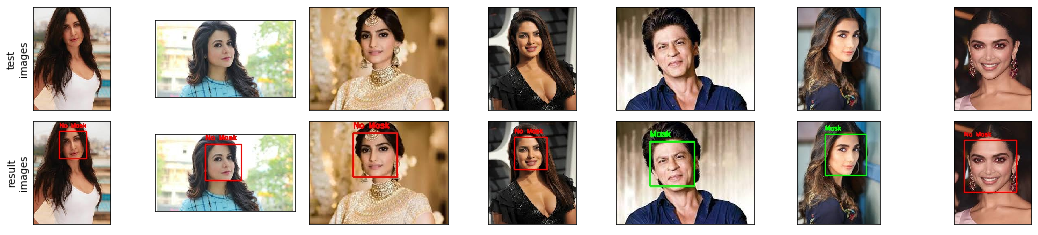

In [11]:
#plotting the images (no. 1- 7)
try:
    fig, ax = plt.subplots(2, 7, figsize=(19, 4),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
    j = 0
    for i in range(0,7):
        ax[0, i].imshow(test_image_li[j])
        ax[1, i].imshow(result_image_li[j])
        j += 1

    ax[0, 0].set_ylabel('test\nimages')
    ax[1, 0].set_ylabel('result\nimages')
except Exception as e:
    print(e)

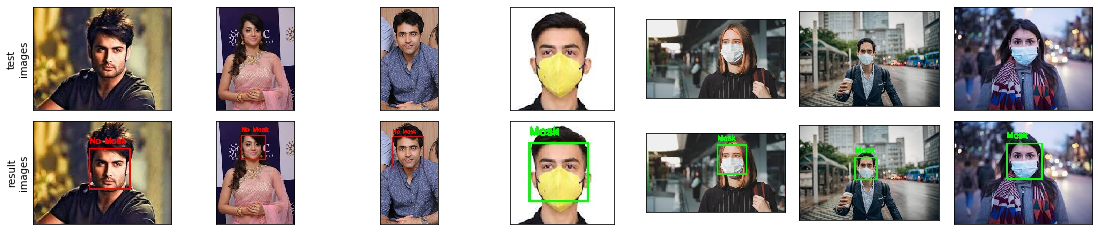

In [12]:
#plotting the images (no. 8- 14)
try:
    fig, ax = plt.subplots(2, 7, figsize=(19, 4),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

    j = 7
    for i in range(0,7):
            ax[0, i].imshow(test_image_li[j])
            ax[1, i].imshow(result_image_li[j])
            j += 1

    ax[0, 0].set_ylabel('test\nimages')
    ax[1, 0].set_ylabel('result\nimages')
except Exception as e:
    print(e)

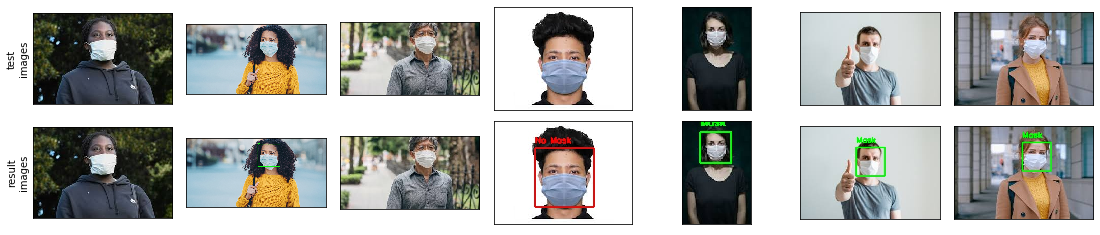

In [13]:
#plotting the images (no. 15- 21)
try:
    fig, ax = plt.subplots(2, 7, figsize=(19, 4),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

    j = 14
    for i in range(0,7):
            ax[0, i].imshow(test_image_li[j])
            ax[1, i].imshow(result_image_li[j])
            j += 1

    ax[0, 0].set_ylabel('test\nimages')
    ax[1, 0].set_ylabel('result\nimages')
except Exception as e:
    print(e)